In [31]:
from matplotlib.pyplot import figure,show,savefig
import json, re

In [32]:
output_folder = "temperatureGrid"

In [33]:
def readSpectrum(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
        return data

In [34]:
def plotSpectrum(filename):
    spectrum = readSpectrum(filename)

    # get temperature
    pattern = ".slabModel_([0-9.]+)K"
    match = re.search(pattern, filename)
    if match:
        temperature = match.group(1)

    fig = figure(figsize=(20,10))
    frame = fig.add_subplot()

    for i,m in enumerate(spectrum):
        frame.plot(m["wavelengths"], m["intensities"], label=f"{m['molecule']} - {m['numberdensity']:.2e} cm$^{-2}$")

    frame.set_title(f"Slab model spectrum at temperature {temperature}K")
    frame.set_xlabel("Wavelength [$\mu$m]")
    frame.set_ylabel("Line intensity [mJy]")
    frame.legend()
    fig.tight_layout()

    show()

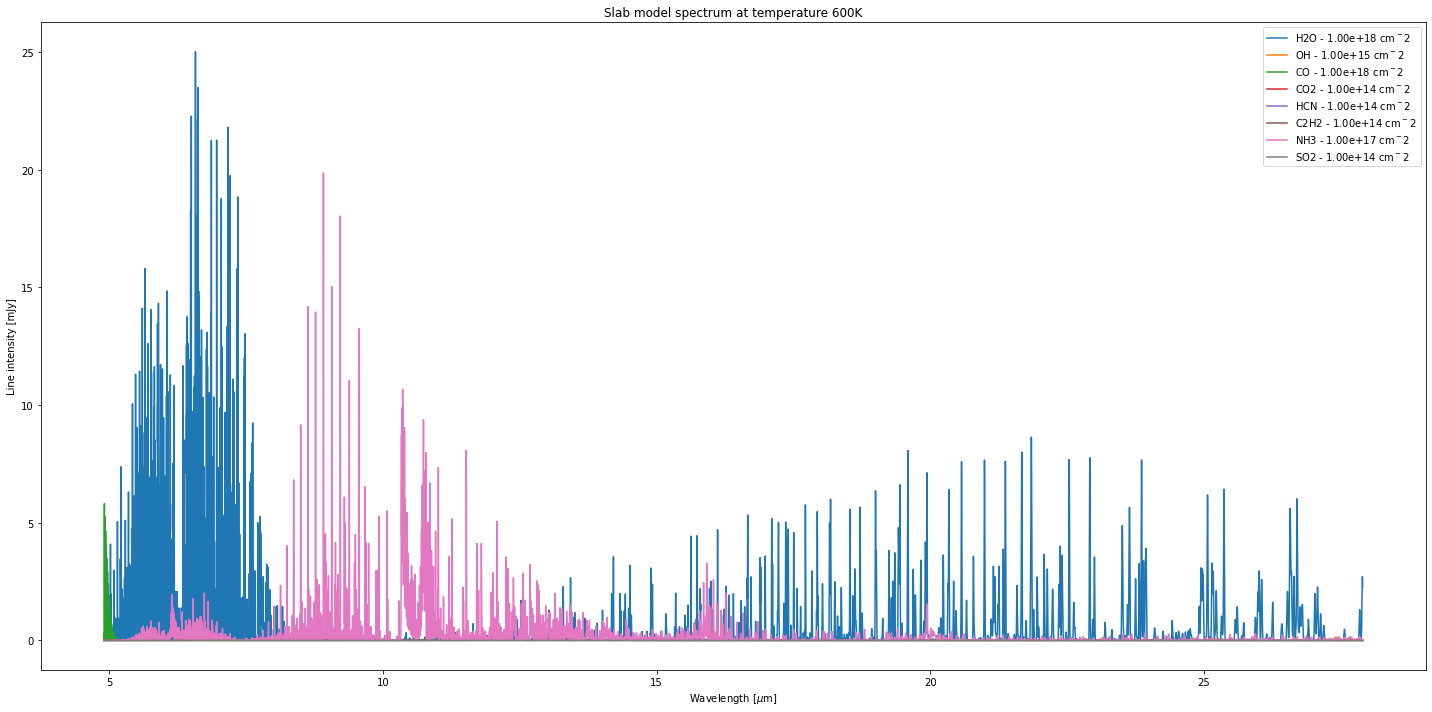

In [35]:
filename = "slabModel_600K"
plotSpectrum(f"{output_folder}/{filename}.json")

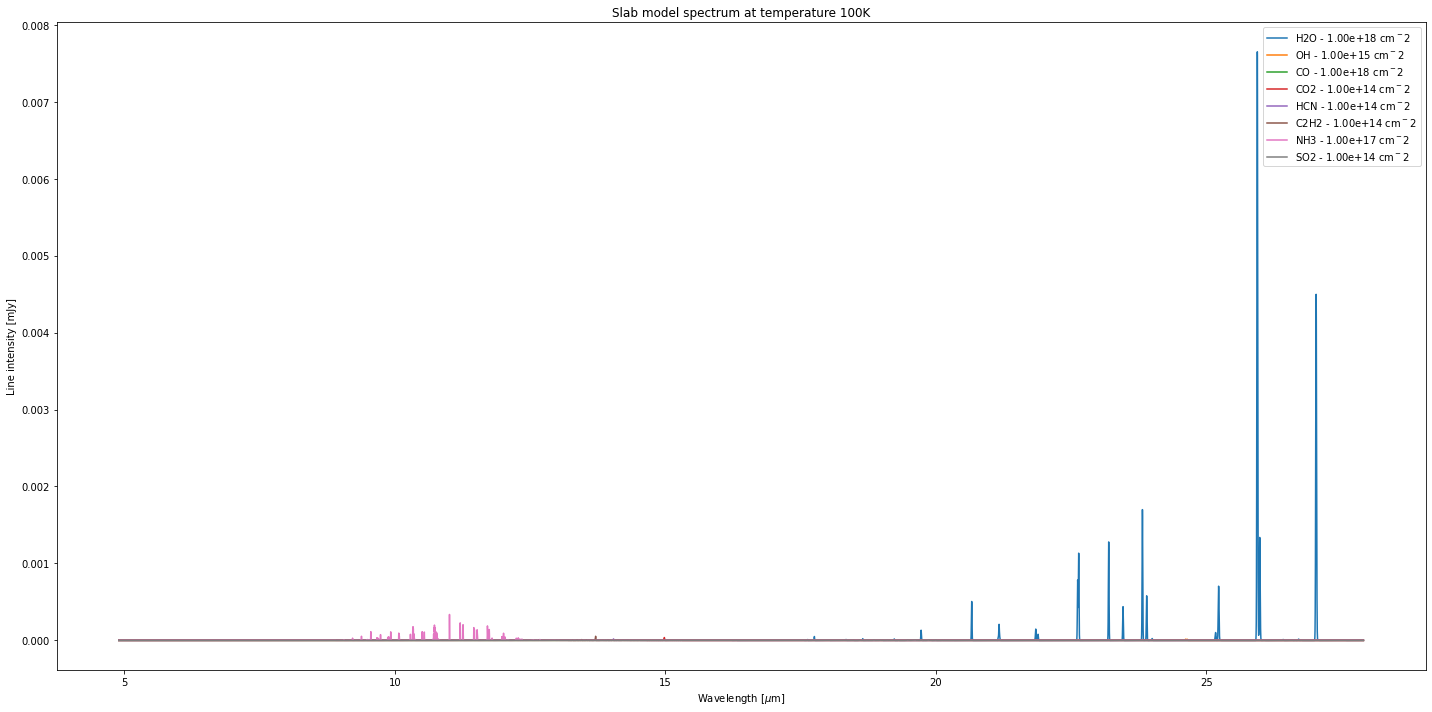

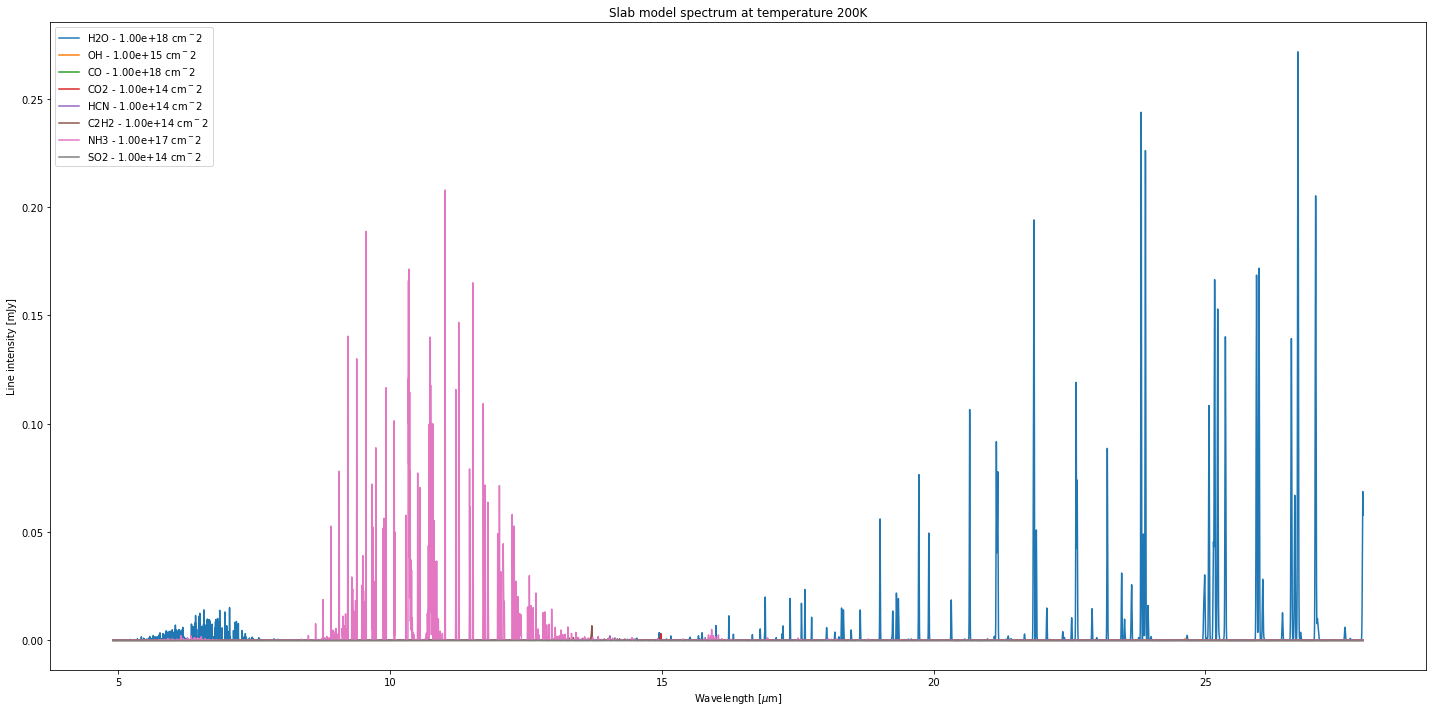

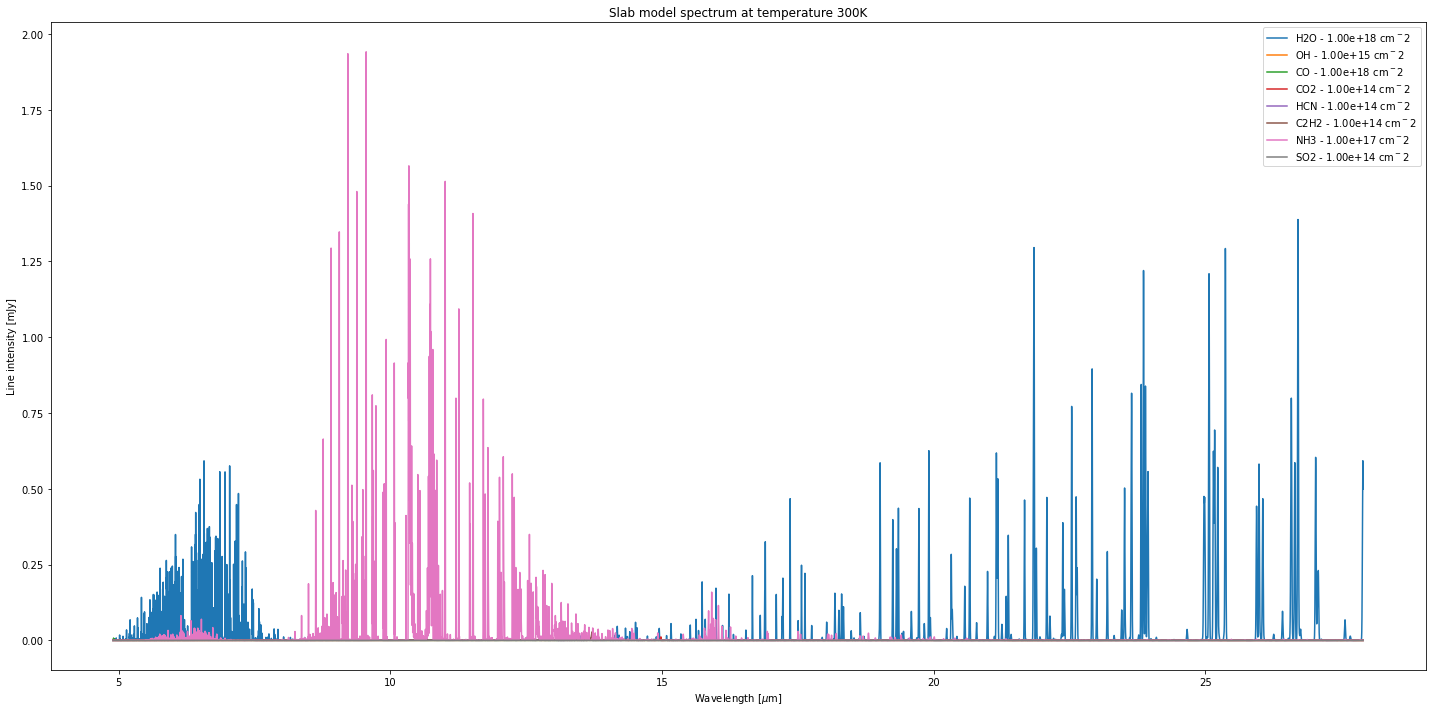

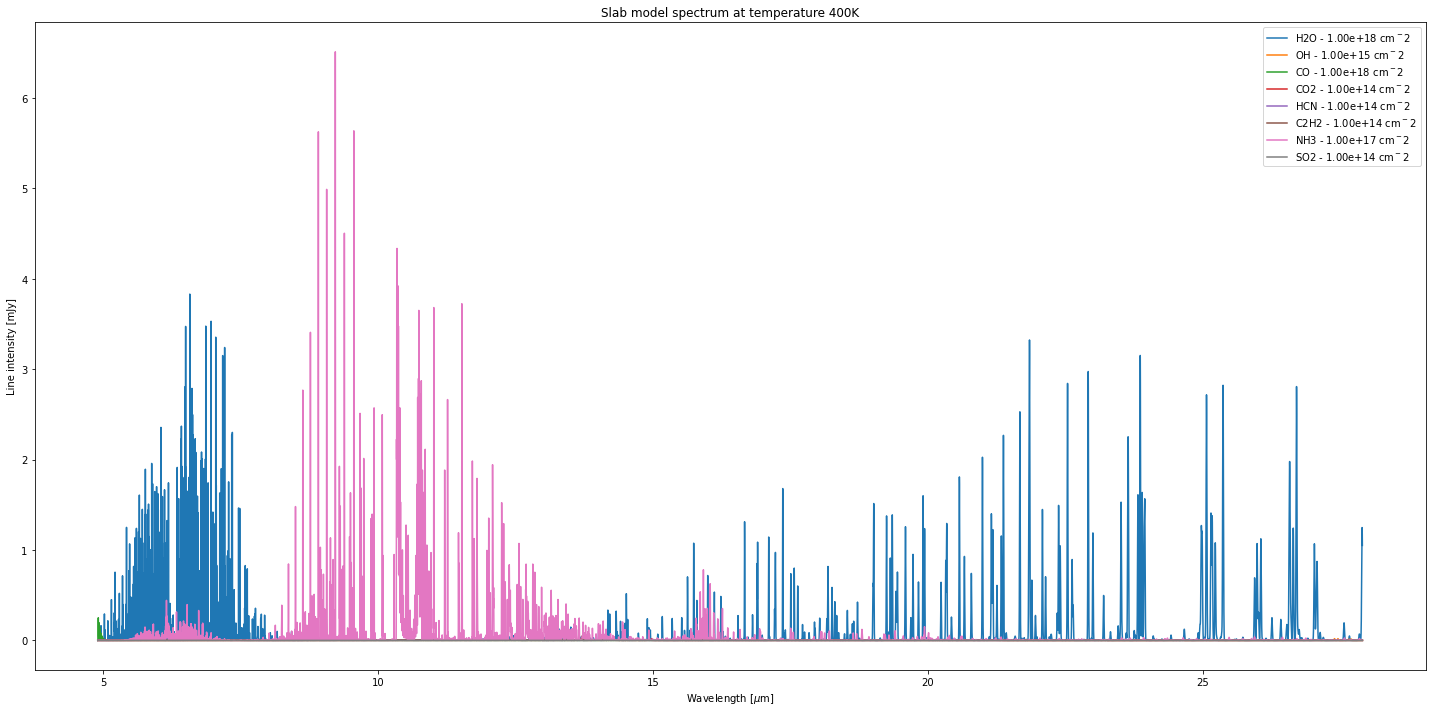

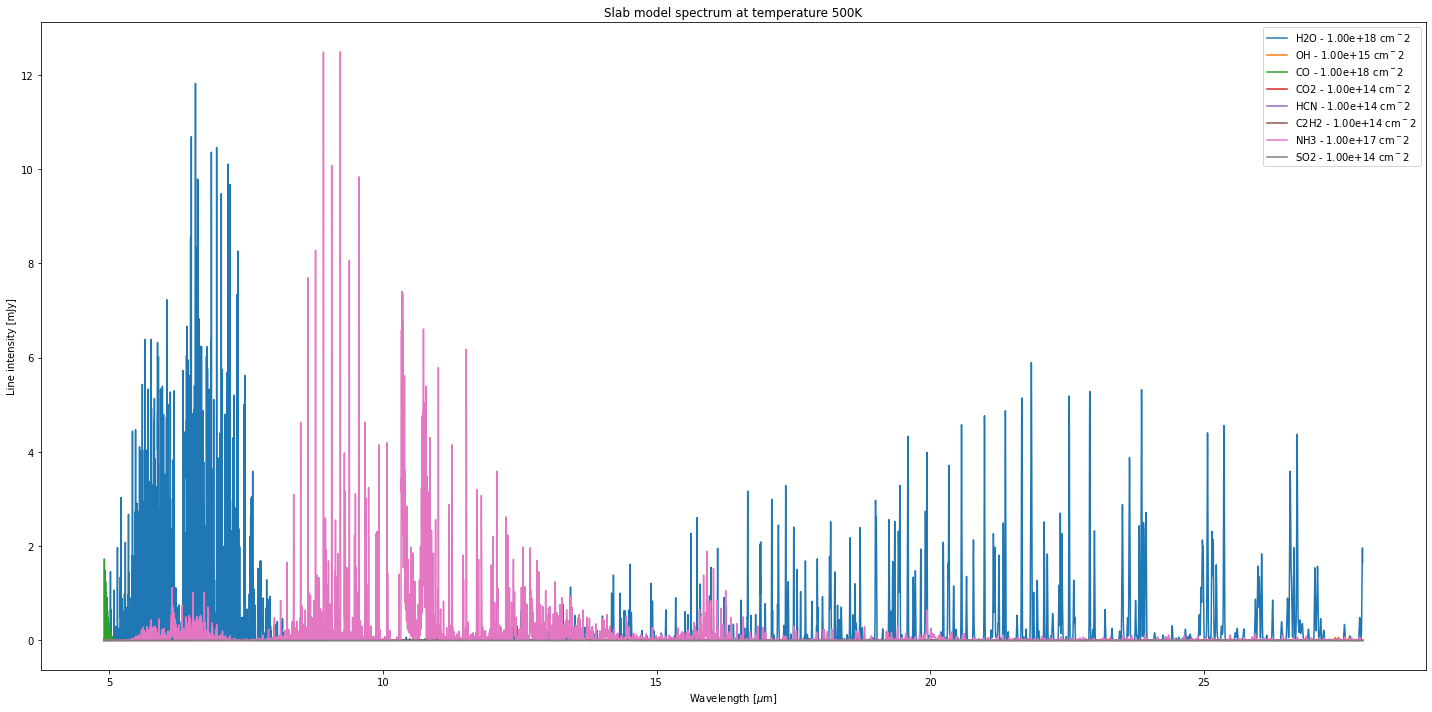

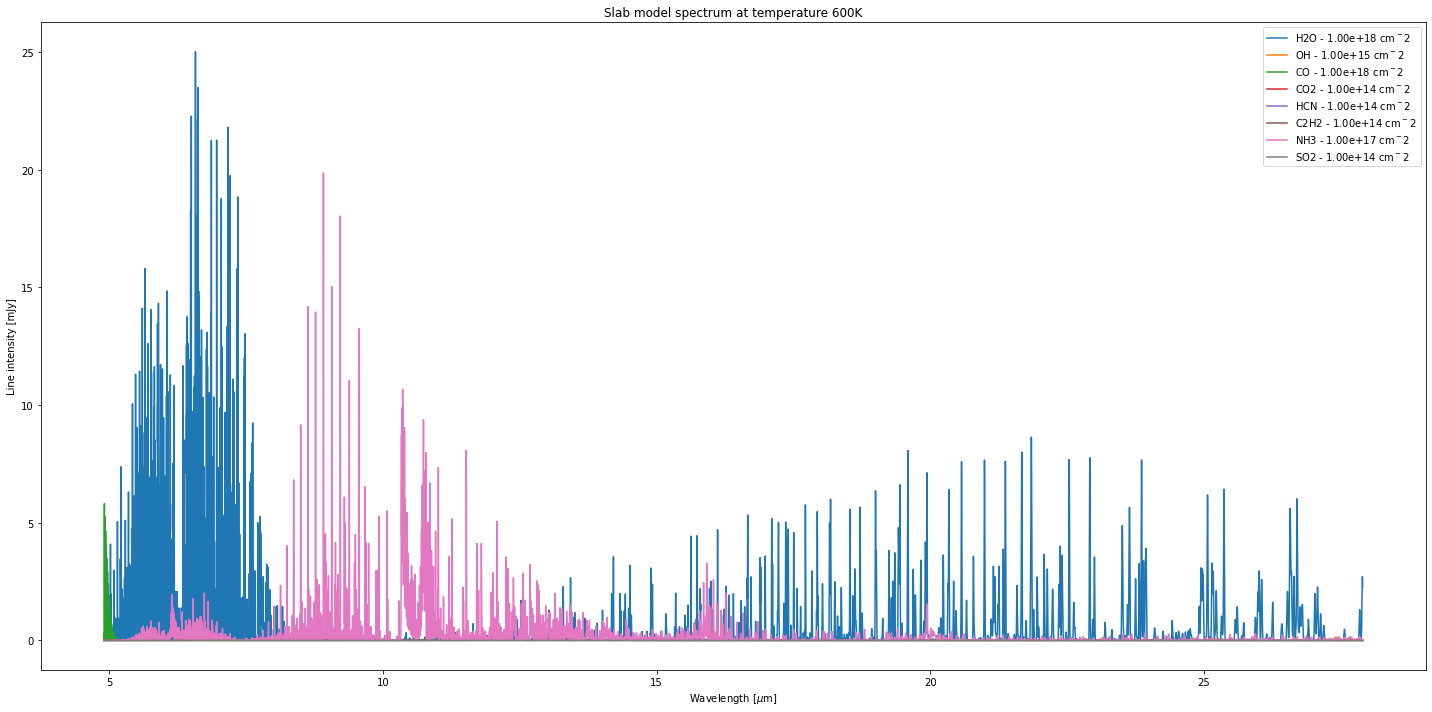

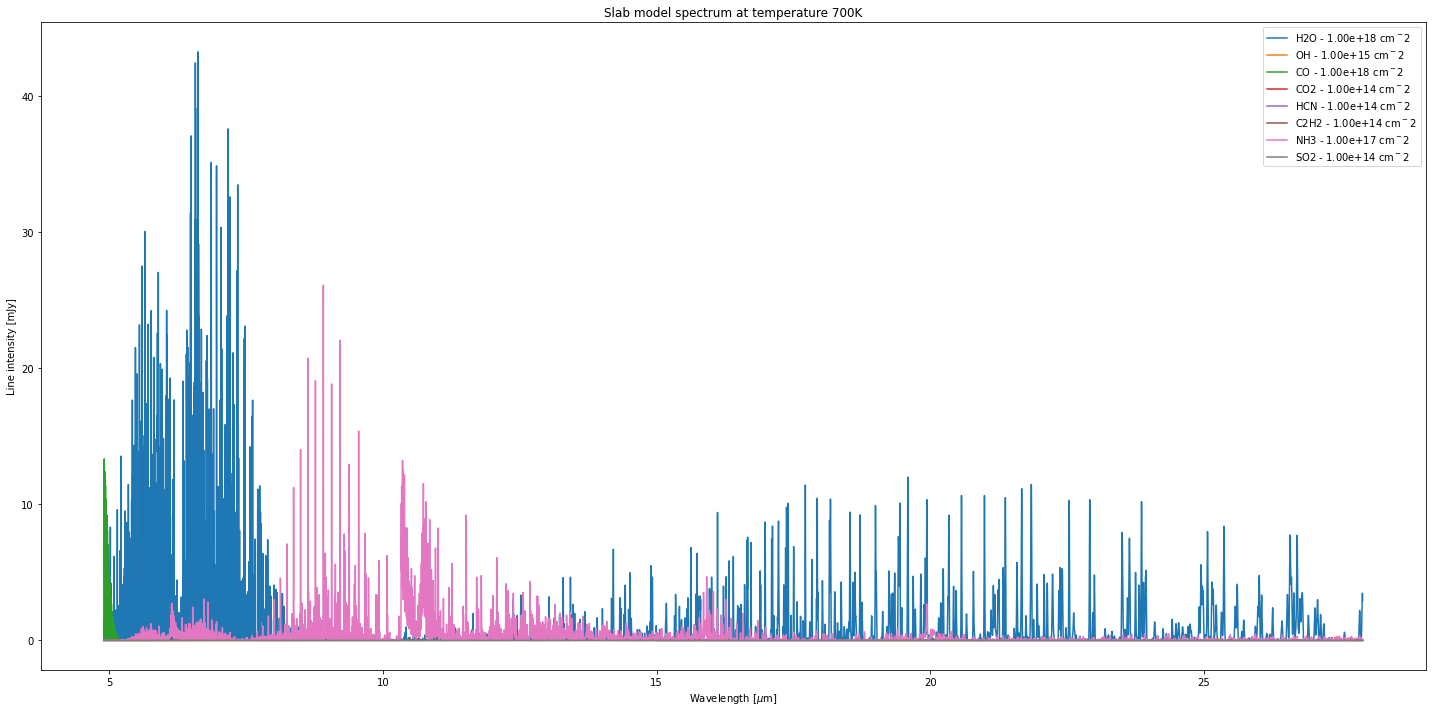

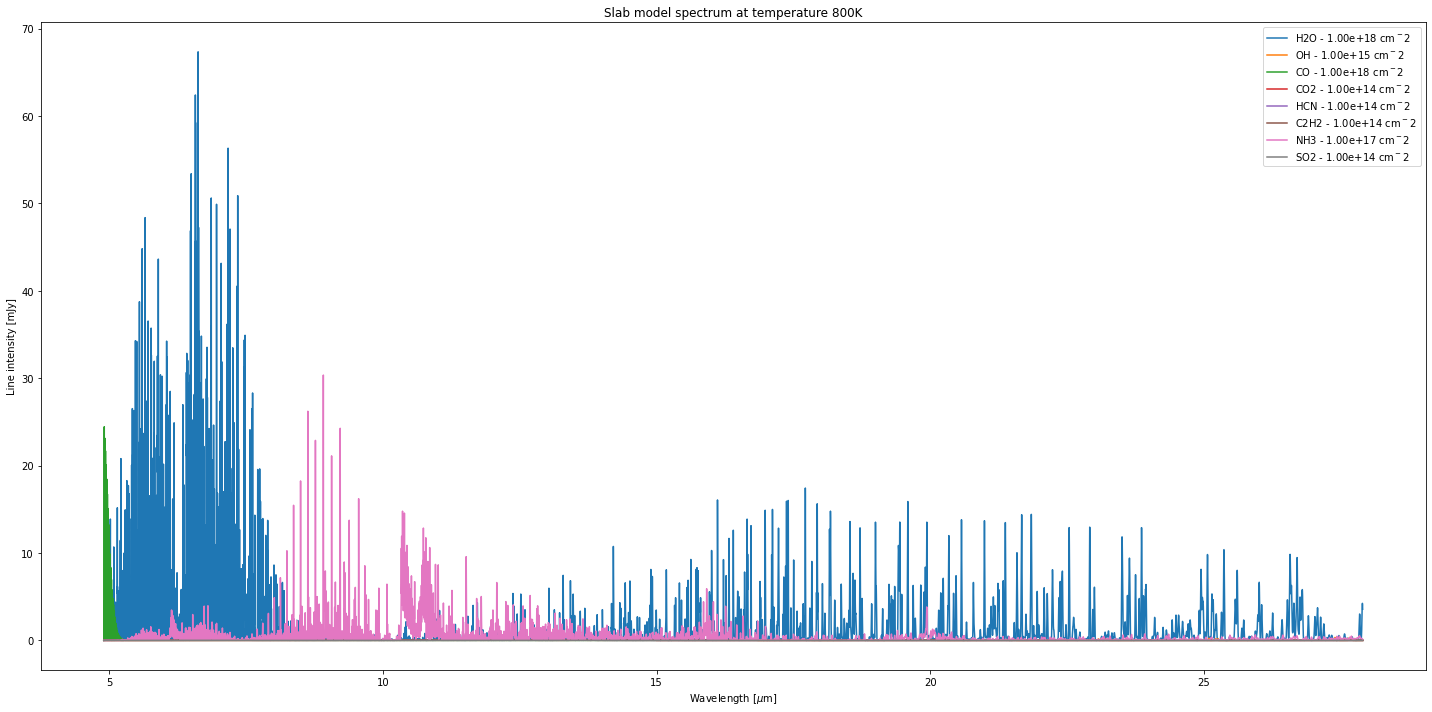

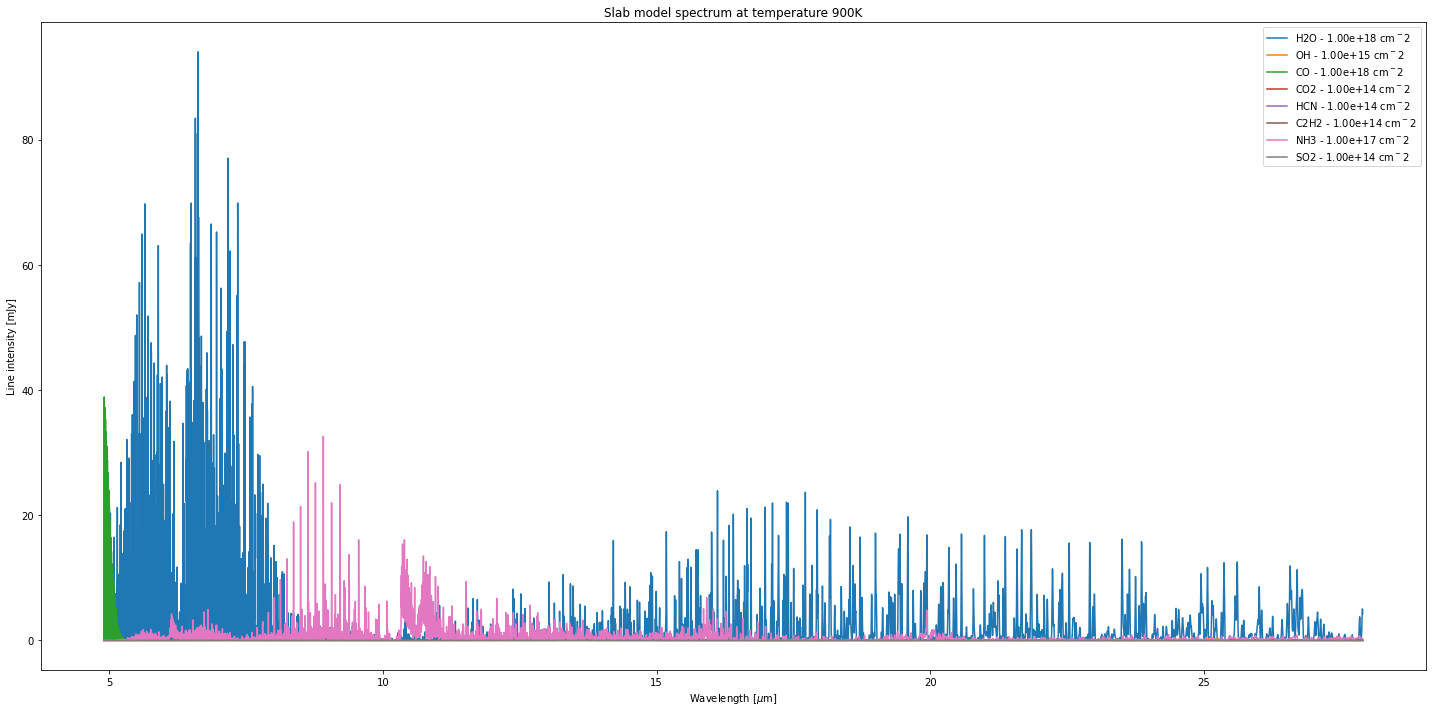

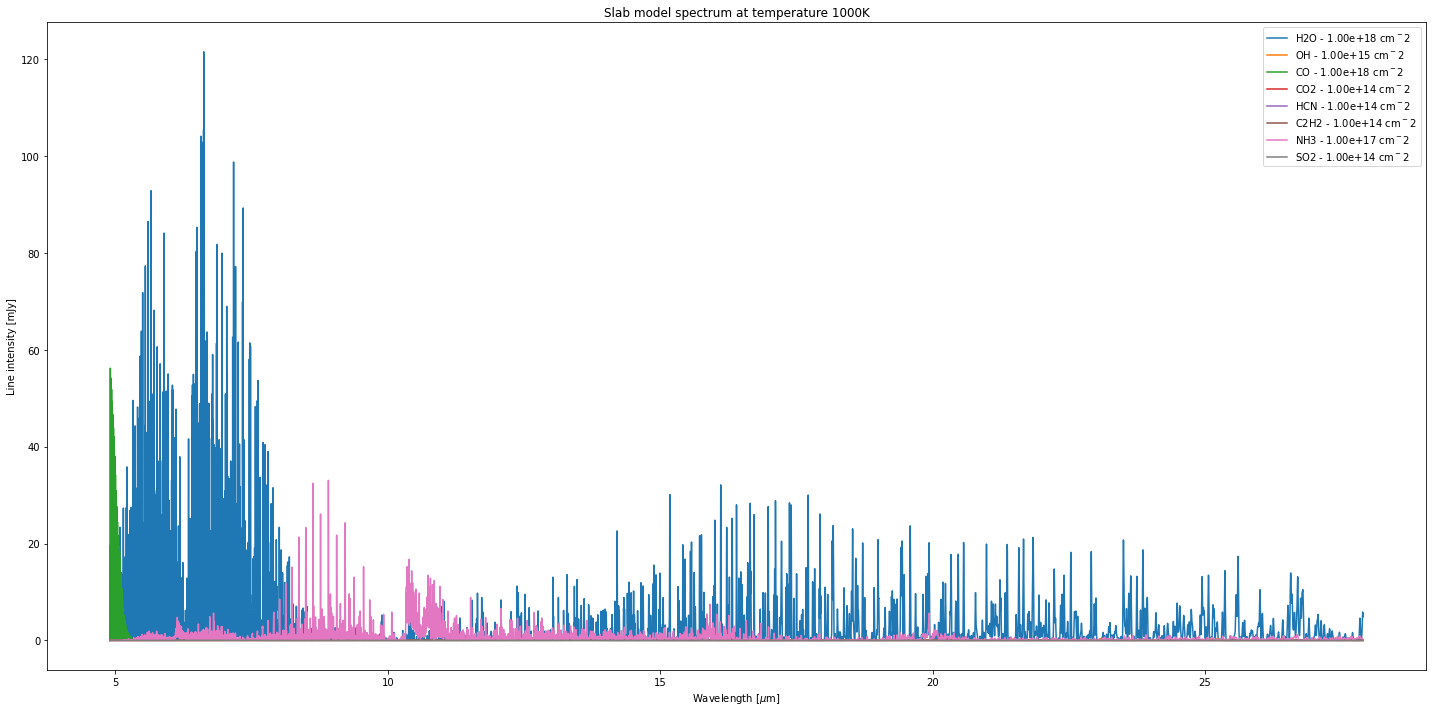

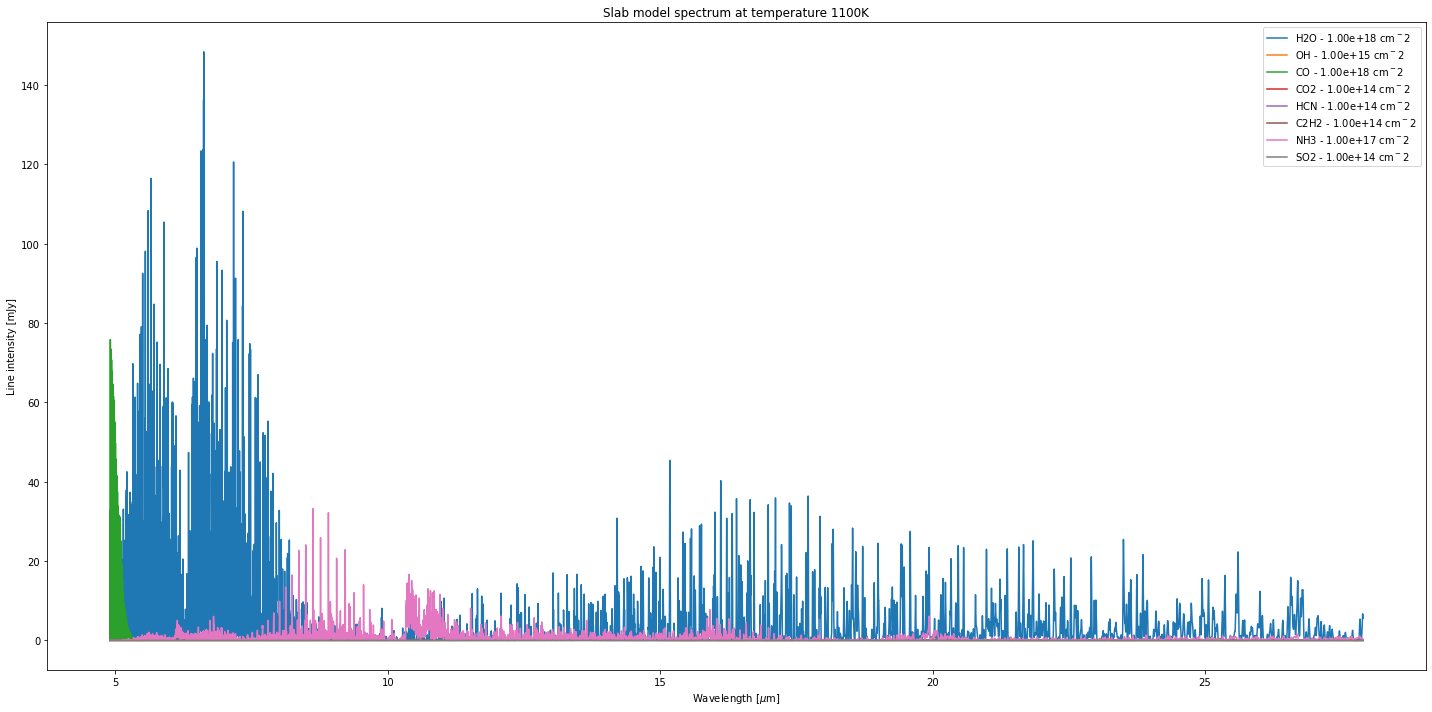

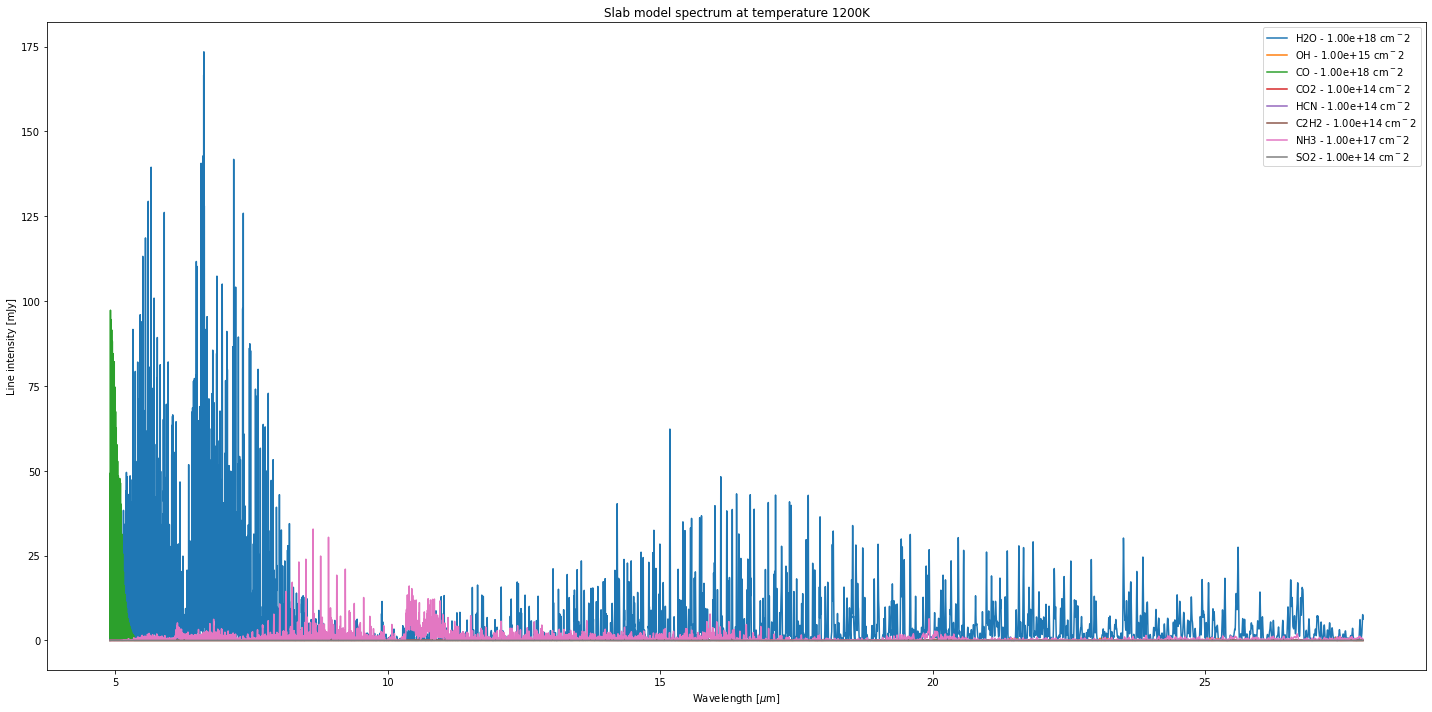

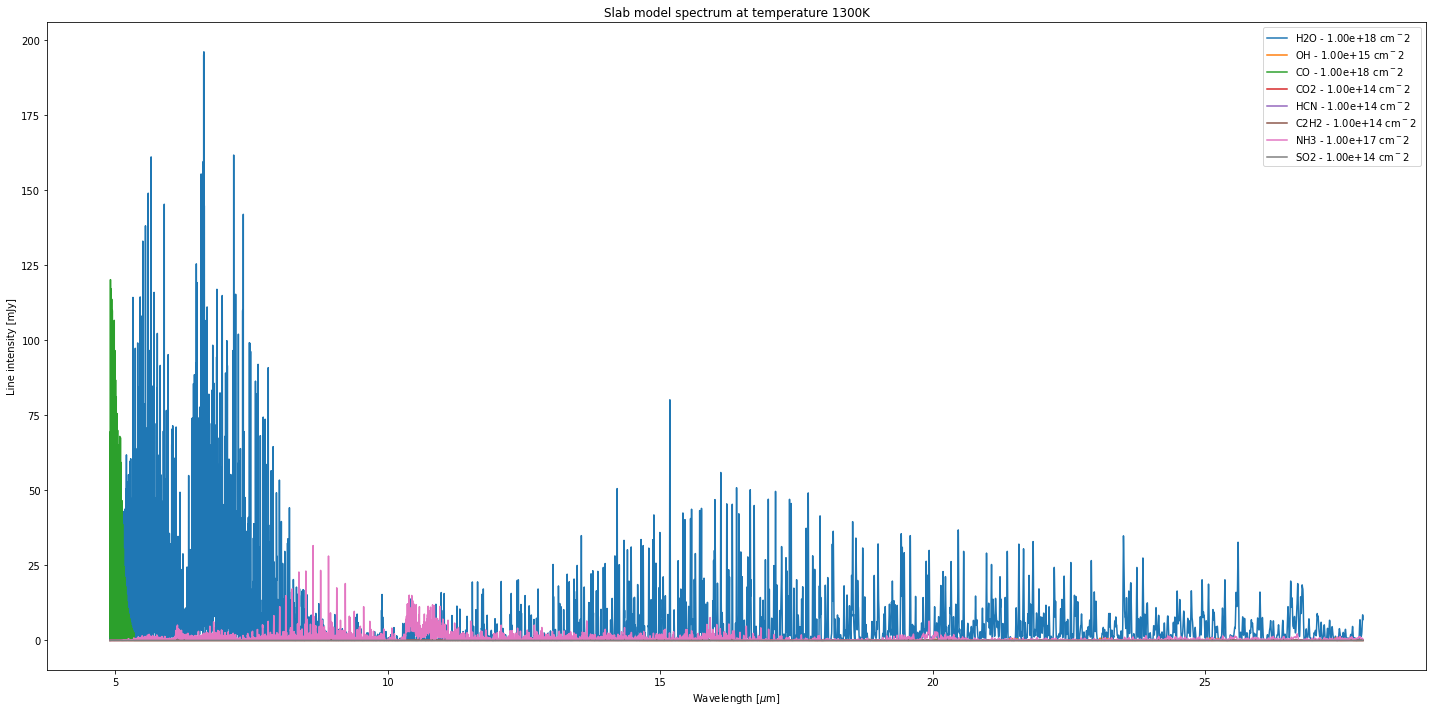

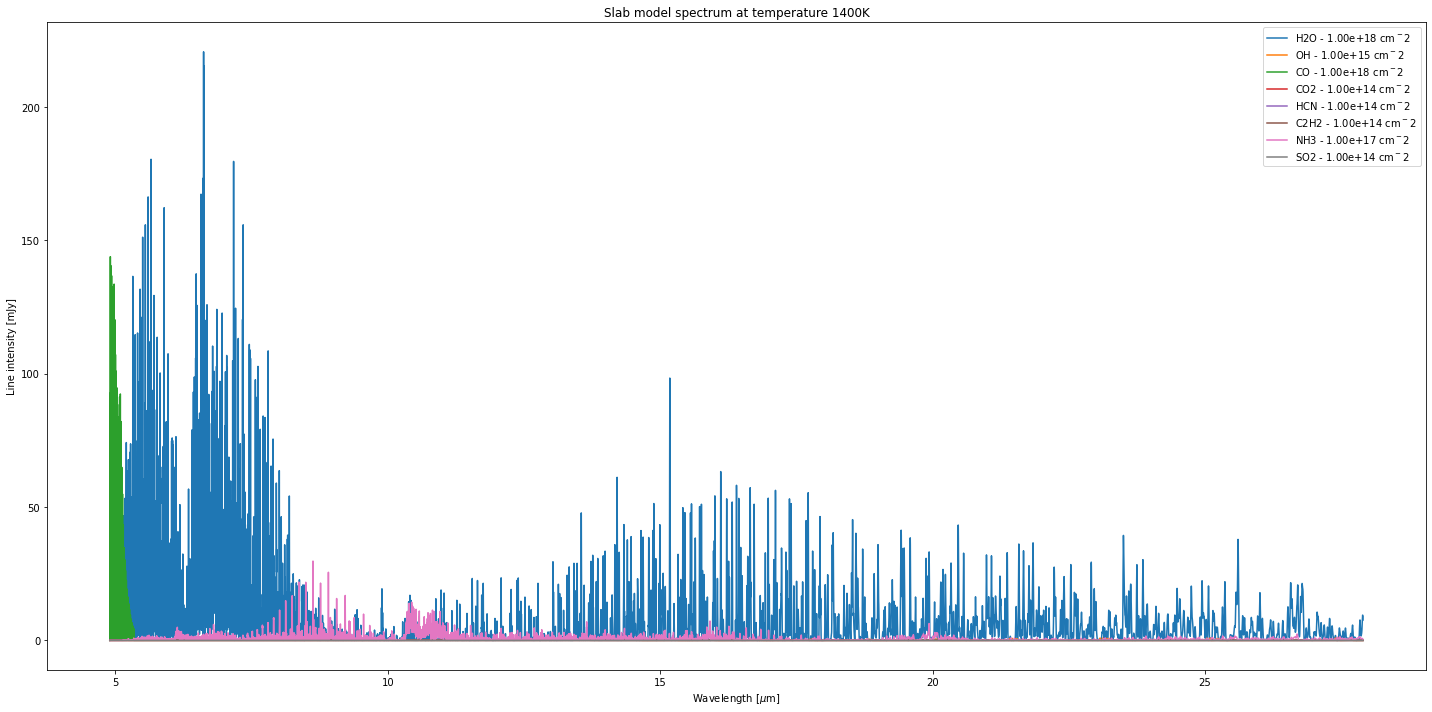

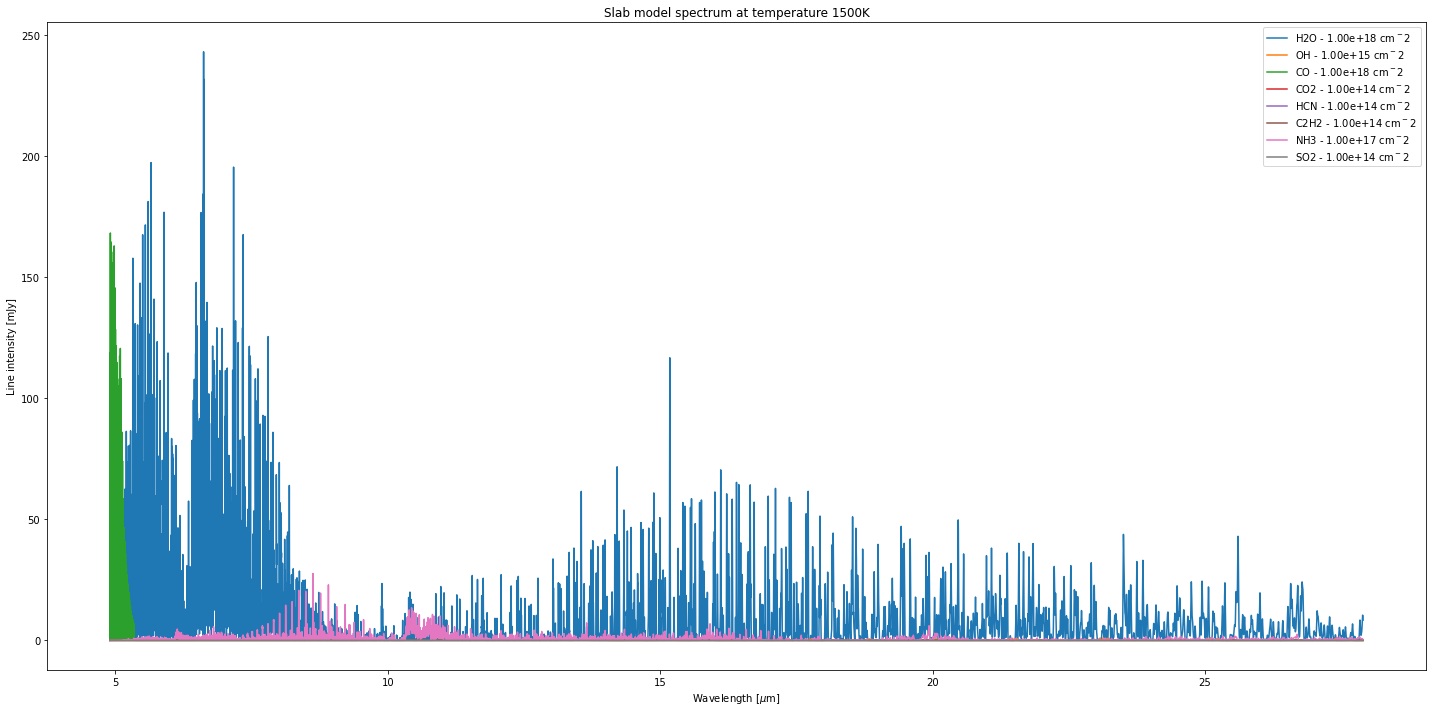

In [37]:
for i in range(1,16):
        temp = i*100
        filename = f"slabModel_{temp}K"
        plotSpectrum(f"{output_folder}/{filename}.json")